<h1>1. GBDT (xgboost/lightgbm) </h1>

<h2>project title preprocessing</h2>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
from wordcloud import WordCloud, STOPWORDS 
import pickle
from tqdm.auto import tqdm,trange
import os

In [3]:
!wget --header="Host: doc-0k-b0-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1Z9rSTNsSLyXeNI33KT9O42omfVl8AFWQ" --header="Cookie: AUTH_c786ms9a8pjpb9kja0mvr3d2mp7acbmq_nonce=b8kpmkkftanfc" --header="Connection: keep-alive" "https://doc-0k-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/mu6d9f56c2idun80b6bmudgv8u3fmrt9/1590137925000/00484516897554883881/16096367365252587562/1Cd-GG86OqeGFn9vmYxUgWOmYtsRAYBDO?e=download&authuser=0&nonce=b8kpmkkftanfc&user=16096367365252587562&hash=p54qgfcu1akac0cr7apvio571ovke5m5" -c -O 'train_data.csv'

--2020-05-22 08:59:33--  https://doc-0k-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/mu6d9f56c2idun80b6bmudgv8u3fmrt9/1590137925000/00484516897554883881/16096367365252587562/1Cd-GG86OqeGFn9vmYxUgWOmYtsRAYBDO?e=download&authuser=0&nonce=b8kpmkkftanfc&user=16096367365252587562&hash=p54qgfcu1akac0cr7apvio571ovke5m5
Resolving doc-0k-b0-docs.googleusercontent.com (doc-0k-b0-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to doc-0k-b0-docs.googleusercontent.com (doc-0k-b0-docs.googleusercontent.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘train_data.csv’

train_data.csv          [       <=>          ] 191.64M  78.9MB/s    in 2.4s    

2020-05-22 08:59:36 (78.9 MB/s) - ‘train_data.csv’ saved [200947019]



In [0]:
project_data = pandas.read_csv('train_data.csv')

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [7]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [8]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 52454.45it/s]


In [9]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


## 1.1 Loading Data

In [10]:
!wget --header="Host: doc-0c-b0-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1Z9rSTNsSLyXeNI33KT9O42omfVl8AFWQ" --header="Cookie: AUTH_c786ms9a8pjpb9kja0mvr3d2mp7acbmq=16096367365252587562|1590137925000|22k7691c9fqbgqt2cc0ao2t19s0i48cq" --header="Connection: keep-alive" "https://doc-0c-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/rmttormm1uhmusjjjmbq0mge6mh4kv3e/1590137925000/00484516897554883881/16096367365252587562/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO?e=download&authuser=0" -c -O 'preprocessed_data.csv'

--2020-05-22 09:00:02--  https://doc-0c-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/rmttormm1uhmusjjjmbq0mge6mh4kv3e/1590137925000/00484516897554883881/16096367365252587562/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO?e=download&authuser=0
Resolving doc-0c-b0-docs.googleusercontent.com (doc-0c-b0-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to doc-0c-b0-docs.googleusercontent.com (doc-0c-b0-docs.googleusercontent.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘preprocessed_data.csv’

preprocessed_data.c     [      <=>           ] 118.69M   111MB/s    in 1.1s    

2020-05-22 09:00:03 (111 MB/s) - ‘preprocessed_data.csv’ saved [124454659]



In [0]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data["project_title"]=preprocessed_titles

In [12]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

print("enconding of essay")
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train["essay"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

essay_vect_tfidf=vectorizer.get_feature_names()
print(len(essay_vect_tfidf))
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

print("="*100)
print("encoding of project title")
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train["project_title"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train["project_title"].values)
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

title_vect_tfidf=vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

(73196, 9) (73196,)
(36052, 9) (36052,)
enconding of essay
5000
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)
encoding of project title
After vectorizations
(73196, 4904) (73196,)
(36052, 4904) (36052,)


<h2>tfidf w2v</h2>

In [29]:
!wget --header="Host: doc-0g-b0-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1Z9rSTNsSLyXeNI33KT9O42omfVl8AFWQ" --header="Cookie: AUTH_c786ms9a8pjpb9kja0mvr3d2mp7acbmq_nonce=k1qu2jt4tmq48" --header="Connection: keep-alive" "https://doc-0g-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/74gpqdf29les98h3ud6k7tmq8nb74tk0/1590138750000/00484516897554883881/16096367365252587562/1zJbDcbwvM2ueudqJHPpOb3Z9V2QrGd2r?e=download&authuser=0&nonce=k1qu2jt4tmq48&user=16096367365252587562&hash=en2hhsmjq9oshmoi28j30tsfidcqpl9l" -c -O 'glove_vectors'

--2020-05-22 09:13:57--  https://doc-0g-b0-docs.googleusercontent.com/docs/securesc/osqr15dsa8os0ct2afjfhurmcaglpf5g/74gpqdf29les98h3ud6k7tmq8nb74tk0/1590138750000/00484516897554883881/16096367365252587562/1zJbDcbwvM2ueudqJHPpOb3Z9V2QrGd2r?e=download&authuser=0&nonce=k1qu2jt4tmq48&user=16096367365252587562&hash=en2hhsmjq9oshmoi28j30tsfidcqpl9l
Resolving doc-0g-b0-docs.googleusercontent.com (doc-0g-b0-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to doc-0g-b0-docs.googleusercontent.com (doc-0g-b0-docs.googleusercontent.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove_vectors’

glove_vectors           [      <=>           ] 121.60M  43.7MB/s    in 2.8s    

2020-05-22 09:14:01 (43.7 MB/s) - ‘glove_vectors’ saved [127506004]



In [0]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
preprocessed_essays = data['essay'].values
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train["essay"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_w2v = tfidf_model.transform(X_train['essay'].values)
X_test_essay_w2v = tfidf_model.transform(X_test['essay'].values)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay.append(vector)

print(len(tfidf_w2v_essay))
print(len(tfidf_w2v_essay[0]))

100%|██████████| 73196/73196 [01:46<00:00, 687.70it/s]

73196
300


In [33]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|██████████| 36052/36052 [00:52<00:00, 684.94it/s]

36052
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train["project_title"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_w2v = tfidf_model.transform(X_train['project_title'].values)
X_test_title_w2v = tfidf_model.transform(X_test['project_title'].values)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["project_title"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title.append(vector)

print(len(tfidf_w2v_title))
print(len(tfidf_w2v_title[0]))

100%|██████████| 73196/73196 [00:01<00:00, 47936.04it/s]

73196
300


In [36]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["project_title"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 45539.14it/s]

36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>ENCODING OF PRICE</h2>

In [37]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_nor = normalizer.transform(X_train['price'].values.reshape(1,-1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_nor = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm=X_train_price_nor.reshape(X_train_price_nor.shape[1],1)
X_test_price_norm=X_test_price_nor.reshape(X_test_price_nor.shape[1],1)
print(X_train_price_norm[0])
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

[0.00042763]
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


<h2> encoding of previously posted projects</h2>

In [38]:

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_pp_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_pp_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_pp_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(X_train_pp_project_norm[0])
X_train_pp_project_norm=X_train_pp_project_norm.reshape(X_train_pp_project_norm.shape[1],1)
X_test_pp_project_norm=X_test_pp_project_norm.reshape(X_test_pp_project_norm.shape[1],1)


print("After vectorizations")
print(X_train_pp_project_norm.shape, y_train.shape)
#print(X_cv_pp_project_norm.shape, y_cv.shape)
print(X_test_pp_project_norm.shape, y_test.shape)
print("="*100)

[0.00298385 0.00099462 0.01653551 ... 0.         0.00037298 0.00186491]
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [39]:
print(X_train_pp_project_norm)

[[0.00298385]
 [0.00099462]
 [0.01653551]
 ...
 [0.        ]
 [0.00037298]
 [0.00186491]]


<h2>encoding of school state</h2>

In [0]:
def response_table(V):
  unique_categories=V.unique()
  t=V
  indices_train=t.keys()
  encoded_variable=[]
  for category in unique_categories:
    c=0
    p=0
    n=0
    temp=[]
    for i in indices_train:
      if category==V[i]:
        c=c+1
        if data["project_is_approved"][i]==0:
          n=n+1
        else:
          p=p+1
    temp.append(n/c)
    temp.append(p/c)
    encoded_variable.append(temp)
  return encoded_variable

In [0]:
def response_coding(V_tr,V_te):
  encoded_variable_train=[]
  encoded_variable_test=[]
  encoded_variable=response_table(V_tr)
  unique_categories=V_tr.unique()
  for category in V_tr:
      k=0
      for j in unique_categories:
          if category==j:
              encoded_variable_train.append(encoded_variable[k])
          k=k+1
  for category in V_te:
      k=0
      for j in unique_categories:
          if category==j:
              encoded_variable_test.append(encoded_variable[k])
          k=k+1
      if category not in unique_categories:
          encoded_variable_test.append([0.5,0.5])
  return encoded_variable_train,encoded_variable_test

In [21]:
encoded_state_train,encoded_state_test=response_coding(X_train["school_state"],X_test["school_state"])
print(len(encoded_state_train))
print(len(encoded_state_test))

73196
36052


<h2>encoding of teacher prefix</h2>

In [22]:
encoded_prefix_train,encoded_prefix_test=response_coding(X_train["teacher_prefix"],X_test["teacher_prefix"])
print(len(encoded_prefix_train))
print(len(encoded_prefix_test))

73196
36052


<h2>encoding of project grade category</h2>

In [23]:
encoded_project_grade_train,encoded_project_grade_test=response_coding(X_train["project_grade_category"],X_test["project_grade_category"])
print(len(encoded_project_grade_train))
print(len(encoded_project_grade_test))


73196
36052


<h2>encoding clean categories</h2>

In [24]:
encoded_clean_categories_train,encoded_clean_categories_test=response_coding(X_train["clean_categories"],X_test["clean_categories"])
print(len(encoded_clean_categories_train))
print(len(encoded_clean_categories_test))


73196
36052


<h2>encoding of clean subcategories</h2>

In [25]:
encoded_clean_subcategories_train,encoded_clean_subcategories_test=response_coding(X_train["clean_subcategories"],X_test["clean_subcategories"])
print(len(encoded_clean_subcategories_train))
print(len(encoded_clean_subcategories_test))


73196
36052


In [26]:
nltk_feature_train=[]
for i in X_train["essay"]:
    ss = sid.polarity_scores(i)
    t=[]
    for k in ss:
        t.append(ss[k])
    nltk_feature_train.append(t)
len(nltk_feature_train)

73196

In [27]:
nltk_feature_test=[]
for i in X_test["essay"]:
    ss = sid.polarity_scores(i)
    t=[]
    for k in ss:
        t.append(ss[k])
    nltk_feature_test.append(t)
len(nltk_feature_test)

36052

<h2>concatenating feature set-1</h2>

In [35]:
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_title_tfidf,encoded_clean_subcategories_train,encoded_clean_categories_train,encoded_state_train,encoded_prefix_train, encoded_project_grade_train, X_train_price_norm,X_train_pp_project_norm,nltk_feature_train)).tocsr()
#X_cr2 = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,X_cv_subcategory_bow,X_cv_category_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_pp_project_norm)).tocsr()
X_te1 = hstack((X_test_essay_tfidf,X_test_title_tfidf,encoded_clean_subcategories_test,encoded_clean_categories_test, encoded_state_test, encoded_prefix_test, encoded_project_grade_test, X_test_price_norm,X_test_pp_project_norm,nltk_feature_test)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
#print(X_cr2.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 9877) (73196,)
(36052, 9877) (36052,)


<h2>concatenating feature set-2</h2>

In [40]:
from scipy.sparse import hstack
from scipy import sparse
a=np.asarray(tfidf_w2v_essay)
b=np.asarray(tfidf_w2v_essay_test)
c=np.asarray(tfidf_w2v_title)
d=np.asarray(tfidf_w2v_title_test)
w2v_essay_train=sparse.csr_matrix(a)
w2v_essay_test=sparse.csr_matrix(b)
w2v_title_train=sparse.csr_matrix(c)
w2v_title_test=sparse.csr_matrix(d)
X_tr2 = hstack((w2v_essay_train,w2v_title_train,encoded_clean_subcategories_train,encoded_clean_categories_train,encoded_state_train,encoded_prefix_train, encoded_project_grade_train,X_train_price_norm,X_train_pp_project_norm)).tocsr()
#X_cr2 = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,X_cv_subcategory_bow,X_cv_category_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_pp_project_norm)).tocsr()
X_te2 = hstack((w2v_essay_test,w2v_title_test,encoded_clean_subcategories_test,encoded_clean_categories_test, encoded_state_test, encoded_prefix_test, encoded_project_grade_test, X_test_price_norm,X_test_pp_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
#print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)


Final Data matrix
(73196, 612) (73196,)
(36052, 612) (36052,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#dtrain1=xgb.DMatrix(X_tr1,y_train)
gbdt=XGBClassifier()
parameters ={"max_depth":[3,4,5,6,7],"n_estimators":[10,50,100,150,200]}
clf1 = GridSearchCV(gbdt, parameters, cv=4,n_jobs=-1,scoring='roc_auc',return_train_score=True)
clf1.fit(X_tr1,y_train)
clf1.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

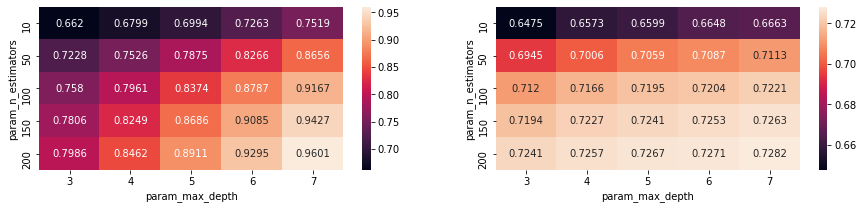

In [56]:
import pandas as pd
import seaborn as sn 
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
result=pd.DataFrame.from_dict(clf1.cv_results_)
max_score=result.groupby(["param_n_estimators","param_max_depth"]).max()
max_score=max_score.unstack()[["mean_test_score","mean_train_score"]]
a=sn.heatmap(max_score.mean_train_score,annot=True,fmt=".4g")
b=fig.add_subplot(122)
a=sn.heatmap(max_score.mean_test_score,annot=True,fmt=".4g")

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

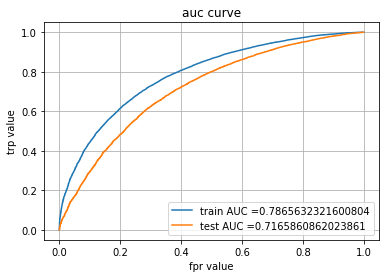

In [39]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
gbdt1 = XGBClassifier(max_depth=3,n_estimators=200)
gbdt1.fit(X_tr1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(gbdt1, X_tr1)    
y_test_pred1= batch_predict(gbdt1, X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr value")
plt.ylabel("trp value")
plt.title("auc curve")
plt.grid()
plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Text(570.5454545454544, 0.5, 'actual')

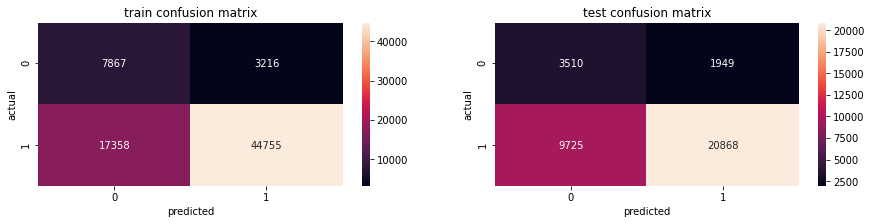

In [47]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
k=confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t))
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a=sn.heatmap(k,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
a.set_title("train confusion matrix")
a.set_xlabel("predicted")
a.set_ylabel("actual")
b=fig.add_subplot(122)
y_pred=predict_with_best_t(y_test_pred1, best_t)
c_test=confusion_matrix(y_test, y_pred)
b=sn.heatmap(c_test,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
b.set_title("test confusion matrix")
b.set_xlabel("predicted")
b.set_ylabel("actual")

<h1>GBDT on feature set-2</h1>

In [39]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#dtrain1=xgb.DMatrix(X_tr1,y_train)
Gbdt=XGBClassifier()
parameters ={"max_depth":[3,4,5,6],"n_estimators":[50,100,150,200]}
clf2 = GridSearchCV(Gbdt, parameters, cv=4,n_jobs=-1,scoring='roc_auc',return_train_score=True)
clf2.fit(X_tr2,y_train)
clf2.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

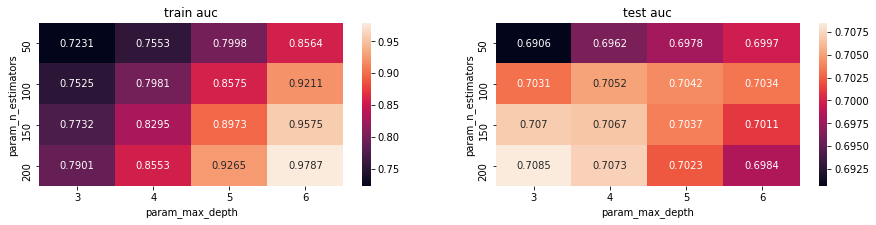

In [41]:
import pandas as pd
import seaborn as sn 
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a.set_title("train auc")
result=pd.DataFrame.from_dict(clf2.cv_results_)
max_score=result.groupby(["param_n_estimators","param_max_depth"]).max()
max_score=max_score.unstack()[["mean_test_score","mean_train_score"]]
a=sn.heatmap(max_score.mean_train_score,annot=True,fmt=".4g")
b=fig.add_subplot(122)
b.set_title("test auc")
a=sn.heatmap(max_score.mean_test_score,annot=True,fmt=".4g")

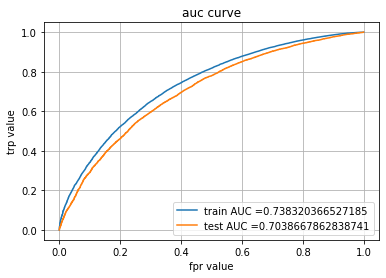

In [43]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

gbdt2 = XGBClassifier(max_depth=3,min_samples_split=200)
gbdt2.fit(X_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_2 = batch_predict(gbdt2, X_tr2)    
y_test_pred_2 = batch_predict(gbdt2, X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr value")
plt.ylabel("trp value")
plt.title("auc curve")
plt.grid()
plt.show()

Text(570.5454545454544, 0.5, 'actual')

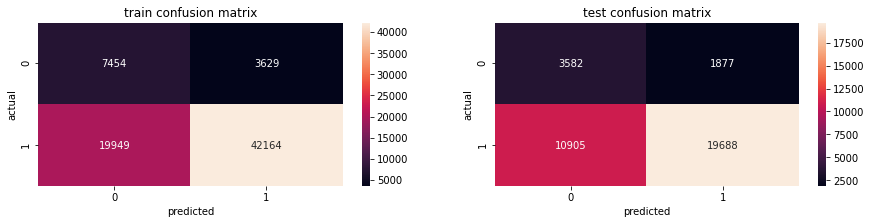

In [45]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
k=confusion_matrix(y_train, predict_with_best_t(y_train_pred_2, best_t))
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a=sn.heatmap(k,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
a.set_title("train confusion matrix")
a.set_xlabel("predicted")
a.set_ylabel("actual")
b=fig.add_subplot(122)
y_pred=predict_with_best_t(y_test_pred_2, best_t)
c_test=confusion_matrix(y_test, y_pred)
b=sn.heatmap(c_test,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
b.set_title("test confusion matrix")
b.set_xlabel("predicted")
b.set_ylabel("actual")

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [47]:
from prettytable import PrettyTable 
t=PrettyTable()
t.field_names=["vectorizer","model","max depth","#estimators","test AUC"]
t.add_row(["tfidf","GBDT",3,200,0.716])
t.add_row(["tfidf w2v","GBDT",3,200,0.703])
print(t)

+------------+-------+-----------+-------------+----------+
| vectorizer | model | max depth | #estimators | test AUC |
+------------+-------+-----------+-------------+----------+
|   tfidf    |  GBDT |     3     |     200     |  0.716   |
| tfidf w2v  |  GBDT |     3     |     200     |  0.703   |
+------------+-------+-----------+-------------+----------+
